# Quantifying non-classical teleportation
## Ivan Supic, Paul Skrzypczyk and Daniel Cavalcanti
### Jupyter notebook to accompany arXiv:xxxx.xxxx

#### Introduction

In this notebook we reproduce all of the figures that appear in the above paper. 

To run this notebook you will need:

- Matlab with the [API for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html) installed.
- [CVX](http://cvxr.com/) Software for Disciplined Convex Programming 
- [QETlab](http://www.qetlab.com/Main_Page) a MATLAB toolbook for quantum entanglement.
- The codes provided in this the github repository

In [142]:
%%file printpdf.m

function printpdf(h,outfilename)

set(h, 'PaperUnits','centimeters');
set(h, 'Units','centimeters');
pos=get(h,'Position');
set(h, 'PaperSize', [pos(3) pos(4)]);
set(h, 'PaperPositionMode', 'manual');
set(h, 'PaperPosition',[0 0 pos(3) pos(4)]);
print('-dpdf',outfilename);

Created file '/home/phyps/git/nonclassicalteleportation/printpdf.m'.


## Figure 2

Here we will look at teleportation using the one-parameter family of states 

$$ \rho = p\left|\Phi^+\right\rangle \left\langle \Phi^+ \right| + (1-p)\left| 01 \right\rangle \left\langle 01 \right| $$
using a full Bell-State-Measurement (BSM), and with input states $\omega_x$ the 6 eigenstates of the Pauli spin operators $X$, $Y$ and $Z$. 

In [98]:
d = 2; % local dimension of all systems 
k = 2; % level of Doherty hierarchy to use

% states

rhoME = MaxEntangled(d)*MaxEntangled(d)';
rho01 = [0 1 0 0]'*[0 1 0 0];
rhoId = eye(d^2)/d^2;

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% (tomographically complete) input states

for x = 1:3
    for a = 0:1
        omegax(:,:,1+a+2*(x-1)) = (eye(2) + (-1)^a*Pauli(x))/2;
    end
end

Produce the data for the graph:

In [99]:
npoints = 101; % number of points to plot
pv = linspace(0,1,npoints); 

TRGv = zeros(1,npoints);
TRCv = zeros(1,npoints);
TRRv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRGv(i) = teleportationRobustness(sigax,omegax,k);
    TRCv(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRRv(i) = teleportationRandomRobustness(sigax,omegax,k);
    
end

We also want to compare to the average fidelity of teleportation that can be acheived with this family of states. 

In [100]:
Ftelv = zeros(1,npoints);

for i = 1:npoints
    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    for a = 1:4
        Ftelv(i) = max(Ftelv(i),trace(rho*Ma(:,:,a))); 
        % We check the fidelity with the 4 outcomes of the BSM, since this is sufficient in this case to
        % find the average fidelity of teleportation
    end
end

Plot the graph:

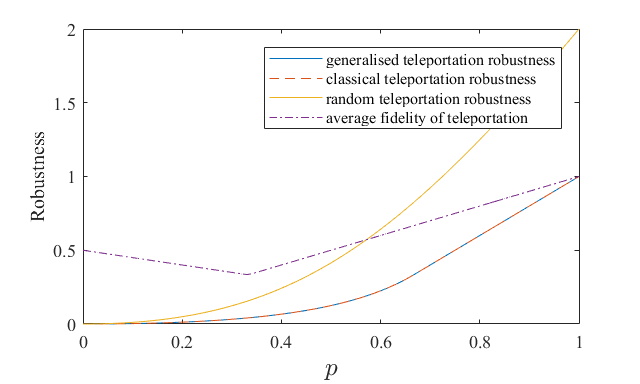

In [153]:
%plot inline --height=420 --width=640 --resolution=128
plot(pv,TRGv,pv,TRCv,'--',pv,TRRv,pv,Ftelv,'-.')
legend({'generalised teleportation robustness','classical teleportation robustness',...
'random teleportation robustness','average fidelity of teleportation'})
xlabel('$p$','Interpreter','latex','FontSize',14)
ylabel('Robustness')
set(gca,'FontName','Times')

We see that all three robustnesses are larger than 0 for all $p> 0$, as expected. Moreover, the random teleportation is largest, while the classical and generalised teleportation robustnesses coincide, just as the separable and generalised entanglement robustnesses do.

## Figure 3

In this figure we will look at the same state from above, but now we will look at the Teleportation Weight (TW) instead. We will consider a partial BSM as well as the full BSM, and consider non-tomographically complete sets of states -- eigenstates of $X$ and $Y$ only.

In [154]:
% (partial) Bell state measurement

Na = zeros(d^2,d^2,2);
Na(:,:,1) = Ma(:,:,1);
Na(:,:,2) = eye(d^2) - Na(:,:,1);

% (non tomographically complete) input states

chix = omegax(:,:,1:4);

Produce the data for the graph:

In [156]:
npoints = 101; 
pv = linspace(0,1,npoints);

TWftv = zeros(1,npoints);
TWptv = zeros(1,npoints);
TWfiv = zeros(1,npoints);
TWpiv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rhoId;
    
    sigax = genTeleportationData(rho,Ma,omegax);
    TWftv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Na,omegax);
    TWptv(i) = teleportationWeight(sigax,omegax,k);
    
    sigax = genTeleportationData(rho,Ma,chix);
    TWfiv(i) = teleportationWeight(sigax,chix,k);
    
    sigax = genTeleportationData(rho,Na,chix);
    TWpiv(i) = teleportationWeight(sigax,chix,k);
    
end

Plot the graph:

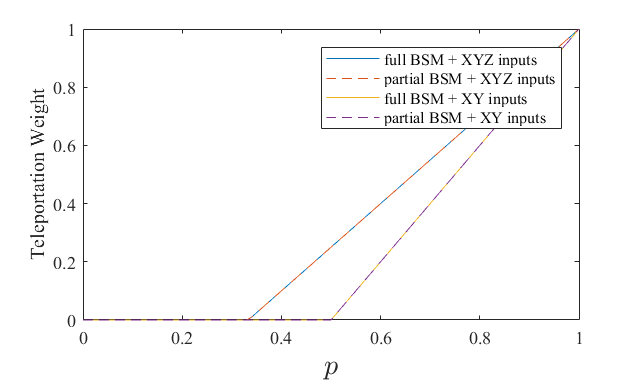

In [164]:
plot(pv,TWftv,pv,TWptv,'--',pv,TWfiv,pv,TWpiv,'--')
legend({'full BSM + XYZ inputs','partial BSM + XYZ inputs',...
'full BSM + XY inputs','partial BSM + XY inputs'})
xlabel('$p$','Interpreter','latex','FontSize',16)
ylabel('Teleportation Weight')
set(gca,'FontName','Times')

## Figure 4

We now want to consider the Horodecki state in $\mathbb{C}^3 \otimes \mathbb{C}^3$ shared between Alice and Bob, and for Alice to perform a partial Bell State Measurement (i.e. projector onto $\left|\Phi^+_3\right\rangle$, and the orthogonal complement). 

For input states we will use the fact that a set of $d^2$ randomly chosen pure states from $\mathbb{C}^d$ form a tomographically complete set of states. Thus we can choose 9 pure states from $\mathbb{C}^3$ at random to produce the figure. 


In [158]:
d = 3;
k = 2;

% partial Bell state measurement

Ma = zeros(d^2,d^2,2);
Ma(:,:,1) = MaxEntangled(d)*MaxEntangled(d)';
Ma(:,:,2) = eye(d^2) - Ma(:,:,1);
% input states (randomly choisen)

omegax = zeros(d,d,d^2);
for i = 1:d^2
    psi = RandomStateVector(d);
    omegax(:,:,i) = psi*psi';
end

Produce the data for the graph:

In [159]:
npoints = 101; 
av = linspace(0,1,npoints);

TRGv = zeros(1,npoints);
TRCv = zeros(1,npoints);
TRRv = zeros(1,npoints);
TWv = zeros(1,npoints);

for i = 1:npoints

    rho = HorodeckiState(av(i));
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TRGv(i) = teleportationRobustness(sigax,omegax,k);
    TRCv(i) = teleportationClassicalRobustness(sigax,omegax,k);
    TRRv(i) = teleportationRandomRobustness(sigax,omegax,k);
    TWv(i) = teleportationWeight(sigax,omegax,k);
    
end

Plot the graph:

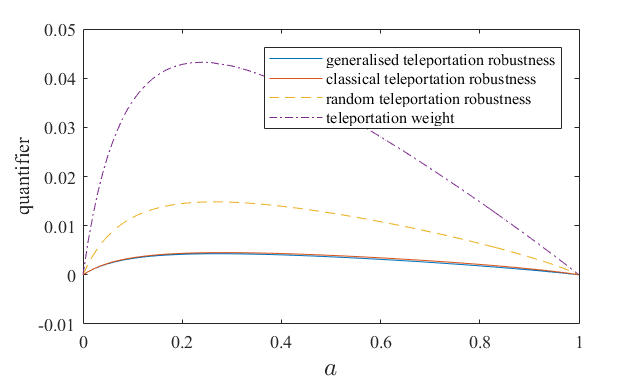

In [171]:
plot(av,TRGv,av,TRCv,av,TRRv,'--',av,TWv,'-.')
ax = gca;
legend({'generalised teleportation robustness','classical teleportation robustness',...
'random teleportation robustness','teleportation weight'})
xlabel('$a$','Interpreter','latex','FontSize',14)
ylabel('quantifier')
set(gca,'FontName','Times')

## Teleportation Negativity

Finally we we look at the Teleportation Negativity. We will go back to the state considered in Fig. 2. 

In [161]:
d = 2; % local dimension of all systems 
k = 2; % level of Doherty hierarchy to use

% states

rhoME = MaxEntangled(d)*MaxEntangled(d)';
rho01 = [0 1 0 0]'*[0 1 0 0];

% (full) Bell state measurement

Ma = BellStateMeasurement(d);

% (tomographically complete) input states

omegax = zeros(d,d,6);
for x = 1:3
    for a = 0:1
        omegax(:,:,1+a+2*(x-1)) = (eye(2) + (-1)^a*Pauli(x))/2;
    end
end

Produce the data for the graph:

In [162]:
npoints = 101; % number of points to plot
pv = linspace(0,1,npoints); 

TNv = zeros(1,npoints);
Nv = zeros(1,npoints);

for i = 1:npoints

    rho = pv(i)*rhoME + (1-pv(i))*rho01;
    sigax = genTeleportationData(rho,Ma,omegax);
    
    TNv(i) = teleportationNegativity(sigax,omegax);
    Nv(i) = Negativity(rho);
    
end

Plot the graph:

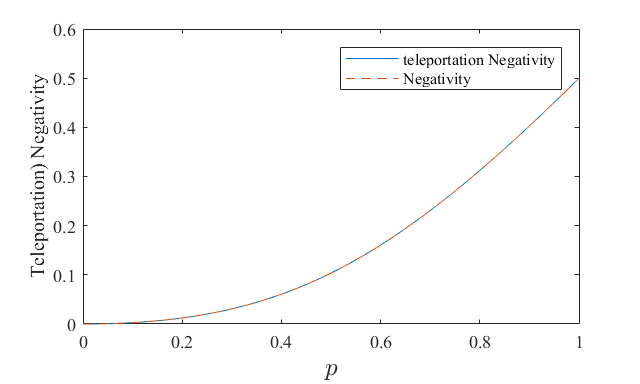

In [168]:
plot(pv,TNv,pv,Nv,'--')
ax = gca;
legend({'teleportation Negativity','Negativity'})
xlabel('$p$','Interpreter','latex','FontSize',14)
ylabel('Teleportation) Negativity')
set(gca,'FontName','Times')